In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/yolov3/darknet

#  give permission to access folder darknet--- after installation of all the other files onto google drive
!chmod u+x darknet

# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mygoogledrive
!ls /mygoogledrive
!ls /mygoogledrive/yolov3/backup

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/yolov3/darknet
ln: failed to create symbolic link '/mygoogledrive/My Drive': Operation not supported
'Colab Notebooks'	  Model
'DeepFashion2 Dataset'	  Patrizio_Reference_Letter_IbrahimElChami_MIT.pdf
 Jonathan_reference.pdf  'Startup Financial Projections.gsheet'
 machinelearningdataset   yolov3
 mask_rcnn_fashion.h5
yolov3_custom_1000.weights  yolov3_custom_last.weights
yolov3_custom_2000.weights


In [0]:

# just needed this for the initial installation

%cd /content/drive/My Drive/yolov3
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

In [0]:
# just needed this for the initial installation


# change makefile to have GPU and OPENCV enabled
%cd darknet

# open Makefile manually and change:
# OPENCV=1 to have the model run on opnecv backend
#GPU=1 to use GPU
#CUDNN=1 enable cuDNN

In [0]:
# just needed this for the initial installation

# verify CUDA
!/usr/local/cuda/bin/nvcc --version

In [0]:
# just needed this for the initial installation


# make darknet (build)
!make

In [0]:
# just needed this for the initial installation

# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
# define helper functions
# darknet has issues displaying images, needs to be done using opnecv backend. This function will display prediction results
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

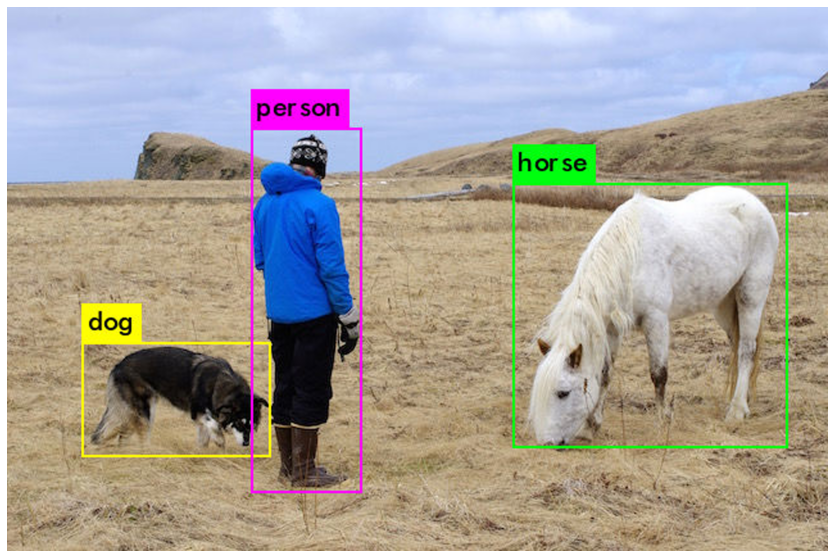

In [0]:
# run darknet detection to verify that the build is working propoerly. 
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg 
# # show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

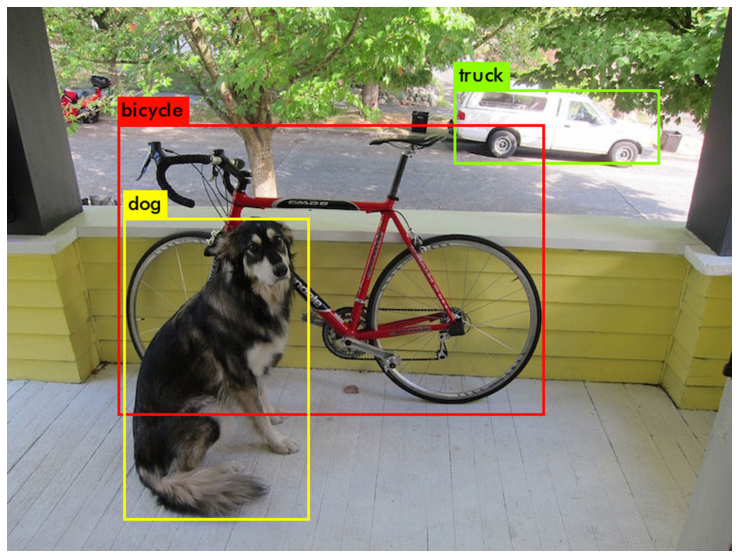

In [0]:
# running detection again
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

In [0]:
# just needed this for the initial installation

# this library facilitates downloading datasets from Open Images Dataset V6 + Extensions. 
#https://storage.googleapis.com/openimages/web/index.html

%cd /content/drive/My Drive/yolov3
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git
%cd /content/drive/My Drive/yolov3/OIDv4_ToolKit/
!pip3 install -r requirements.txt


# from storage.googleapis.com/openimages/web/index.html, check the datasets that are nedded

# manually change the classes in /OIDv4_ToolKit/classes.txt to the classes downloaded from the google dataset




In [0]:
# just needed this for the initial installation


# downloading specific classes from the google dataset with a limit of 300 images for each class, with their labels in csv
# into one folder. For the fashion dataset, classes are ['Shirt', 'Shorts', 'Jeans', 'Dress', 'Boot']
!python3 main.py downloader --classes Shirt Shorts Jeans Dress Boot --type_csv train --limit 300 --multiclasses 1


[Errno 2] No such file or directory: '/content/drive/My_Drive/yolov3/OIDv4_ToolKit/'
/content/drive/My Drive/yolov3/OIDv4_ToolKit

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Shirt', 'Shorts', 'Jeans', 'Dress', 'Boot'] together.
   [ERROR]

In [0]:
# just needed this for the initial installation


# converting the annotations to make them Yolov3 compatible. switch around the coordinates of bounding boxes, and 
# assigning class labels to images, based on the classes identified in /OIDv4_ToolKit/classes.txt
!python3 convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Shirt_Shorts_Jeans_Dress_Boot
100% 1472/1472 [01:05<00:00, 22.40it/s]


In [0]:
# this creates a symbolic link so that the path /content/drive/My\ Drive/ is equal to /mygoogledrive

!ln -s /content/drive/My\ Drive/ /mygoogledrive
!ls /mygoogledrive
!ls /mygoogledrive/yolov3/backup

'Colab Notebooks'	  Model
'DeepFashion2 Dataset'	  Patrizio_Reference_Letter_IbrahimElChami_MIT.pdf
 Jonathan_reference.pdf  'Startup Financial Projections.gsheet'
 machinelearningdataset   yolov3
 mask_rcnn_fashion.h5
yolov3_custom_1000.weights  yolov3_custom_last.weights


In [0]:
# just needed this for the initial installation

# this will remove the Labels folders from the downloaded dataset
# !rm -r /content/drive/My\ Drive/yolov3/OIDv4_ToolKit/OID/Dataset/train/Shirt_Shorts_Jeans_Dress_Boot/Label/


In [0]:
# just needed this for the initial installation


# copy the Shirt_Shorts_Jeans_Dress_Boot folder that was downloaded, into darknet/data/obj (then renaming it obj)
!cp -R /mygoogledrive/yolov3/OIDv4_ToolKit/OID/Dataset/train/Shirt_Shorts_Jeans_Dress_Boot /mygoogledrive/yolov3/darknet/data/Shirt_Shorts_Jeans_Dress_Boot


In [0]:
# just needed this for the initial installation

# grab a copy of the yolo weights. rename it, open it in text editor in google drive, and change parameters into 
# recommneded parameters suitable for 5 classes, then have a copy in the cnfig folder in darknet
!cp cfg/yolov3.cfg /mygoogledrive/yolov3/yolov3_custom2.cfg

In [0]:
# just needed this for the initial installation


# create two files. obj.names, obj.data. 
# obj.names is the exact same content as classes.txt. same order of classes. 
# obj.data contins:
# classes= number of classes
# train= data/train.txt
# valid= data/test.txe
# names= data/obj.names
# backup = /mygoogledrive/yolov3/backup   ## is the folder to backup data to.

# upload both obj.names and obj.data files to darknet/data



In [0]:
# use generate_train.py from  - YOLOv3-Cloud-Tutorial-master---YouTube / yolov3 to create a train.txt with 
# all the images names and their labels into one line
!python3 /mygoogledrive/yolov3/generate_train.py

In [0]:
# verify train.txt can be seen in  darknet/data folder
%cd /content/drive/My Drive/yolov3/darknet

!ls data/

/content/drive/My Drive/yolov3/darknet
9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# download Download pre-trained weights for the convolutional layers
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-04-28 21:35:37--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-04-28 21:35:38--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   451KB/s    in 9m 52s  

2020-04-28 21:45:31 (268 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [0]:
# train the custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.758740, GIOU: 0.749955), Class: 0.962524, Obj: 0.486719, No Obj: 0.002495, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.207950, iou_loss = 0.034768, total_loss = 0.242719 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.580785, GIOU: 0.510288), Class: 0.790729, Obj: 0.109063, No Obj: 0.000812, .5R: 0.666667, .75R: 0.333333, count: 3, class_loss = 0.777154, iou_loss = 0.596302, total_loss = 1.373456 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.495028, GIOU: 0.495029), Class: 0.445910, Obj: 0.000581, No Obj: 0.000058, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.360966, iou_loss = 0.209461, total_loss = 0.570427 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.001226, .5R: 0.000000, .75R: 0.000000, count: 1,

In [0]:
imShow('chart.png')

In [0]:
# this will save the latest wieght every 100 iterations, and save a wieght cfg file every 1000 iterations. 
# this will allow the training to continue from the lastest saved weight
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mygoogledrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [0]:
# set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/drive/My Drive/yolov3/darknet/cfg
/content/drive/My Drive/yolov3/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

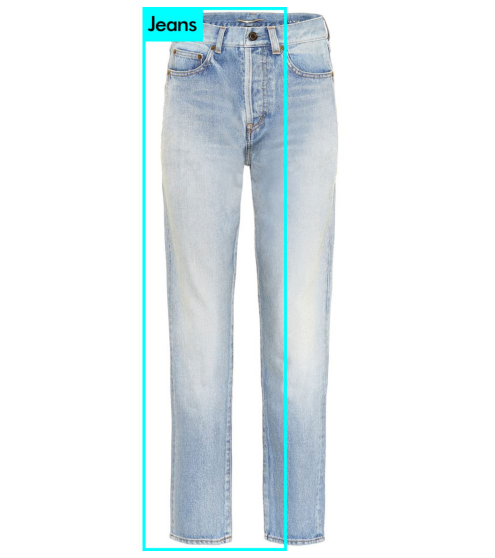

In [0]:
# run the custom detector setting the classes names, weights, image, threshold. 
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mygoogledrive/yolov3/backup/yolov3_custom_last.weights /mygoogledrive/yolov3/test_image/P00402510.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 BF
   9 conv     64 

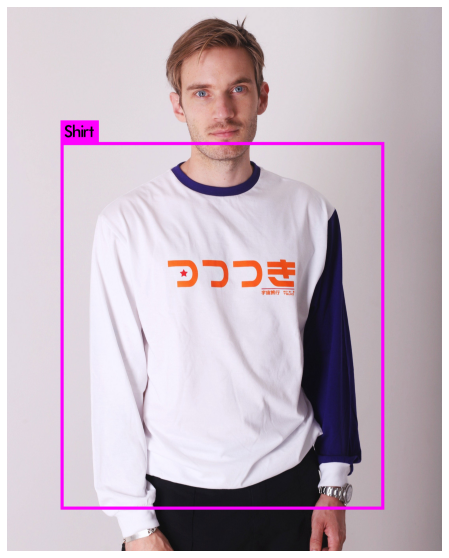

In [0]:
# other test images 
# test_image='felix-longsleeve.jpg'
# test_image='ahzekLR.jpg'
# test_image='front.jpg'

!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mygoogledrive/yolov3/backup/yolov3_custom_last.weights /mygoogledrive/yolov3/darknet/felix-longsleeve.jpg -thresh 0.3
imShow('predictions.jpg')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
Shorts 73.33335876464844


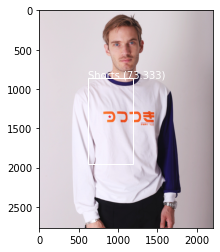

In [0]:
# trying to convert the yolo model to keras. however, the results have different results.  
# wrong classification

# load yolov3 model and perform object detection
# based on https://github.com/experiencor/keras-yolo3
import numpy as np
from numpy import expand_dims
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from matplotlib.patches import Rectangle

class BoundBox:
	def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
		self.xmin = xmin
		self.ymin = ymin
		self.xmax = xmax
		self.ymax = ymax
		self.objness = objness
		self.classes = classes
		self.label = -1
		self.score = -1

	def get_label(self):
		if self.label == -1:
			self.label = np.argmax(self.classes)

		return self.label

	def get_score(self):
		if self.score == -1:
			self.score = self.classes[self.get_label()]

		return self.score

def _sigmoid(x):
	return 1. / (1. + np.exp(-x))

def decode_netout(netout, anchors, obj_thresh, net_h, net_w):
	grid_h, grid_w = netout.shape[:2]
	nb_box = 3
	netout = netout.reshape((grid_h, grid_w, nb_box, -1))
	nb_class = netout.shape[-1] - 5
	boxes = []
	netout[..., :2]  = _sigmoid(netout[..., :2])
	netout[..., 4:]  = _sigmoid(netout[..., 4:])
	netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
	netout[..., 5:] *= netout[..., 5:] > obj_thresh

	for i in range(grid_h*grid_w):
		row = i / grid_w
		col = i % grid_w
		for b in range(nb_box):
			# 4th element is objectness score
			objectness = netout[int(row)][int(col)][b][4]
			if(objectness.all() <= obj_thresh): continue
			# first 4 elements are x, y, w, and h
			x, y, w, h = netout[int(row)][int(col)][b][:4]
			x = (col + x) / grid_w # center position, unit: image width
			y = (row + y) / grid_h # center position, unit: image height
			w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
			h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height
			# last elements are class probabilities
			classes = netout[int(row)][col][b][5:]
			box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
			boxes.append(box)
	return boxes

def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
	new_w, new_h = net_w, net_h
	for i in range(len(boxes)):
		x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
		y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
		boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
		boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
		boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
		boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

def _interval_overlap(interval_a, interval_b):
	x1, x2 = interval_a
	x3, x4 = interval_b
	if x3 < x1:
		if x4 < x1:
			return 0
		else:
			return min(x2,x4) - x1
	else:
		if x2 < x3:
			 return 0
		else:
			return min(x2,x4) - x3

def bbox_iou(box1, box2):
	intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
	intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])
	intersect = intersect_w * intersect_h
	w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
	w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin
	union = w1*h1 + w2*h2 - intersect
	return float(intersect) / union

def do_nms(boxes, nms_thresh):
	if len(boxes) > 0:
		nb_class = len(boxes[0].classes)
	else:
		return
	for c in range(nb_class):
		sorted_indices = np.argsort([-box.classes[c] for box in boxes])
		for i in range(len(sorted_indices)):
			index_i = sorted_indices[i]
			if boxes[index_i].classes[c] == 0: continue
			for j in range(i+1, len(sorted_indices)):
				index_j = sorted_indices[j]
				if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
					boxes[index_j].classes[c] = 0

# load and prepare an image
def load_image_pixels(filename, shape):
	# load the image to get its shape
	image = load_img(filename)
	width, height = image.size
	# load the image with the required size
	image = load_img(filename, target_size=shape)
	# convert to numpy array
	image = img_to_array(image)
	# scale pixel values to [0, 1]
	image = image.astype('float32')
	image /= 255.0
	# add a dimension so that we have one sample
	image = expand_dims(image, 0)
	return image, width, height

# get all of the results above a threshold
def get_boxes(boxes, labels, thresh):
	v_boxes, v_labels, v_scores = list(), list(), list()
	# enumerate all boxes
	for box in boxes:
		# enumerate all possible labels
		for i in range(len(labels)):
			# check if the threshold for this label is high enough
			if box.classes[i] > thresh:
				v_boxes.append(box)
				v_labels.append(labels[i])
				v_scores.append(box.classes[i]*100)
				# don't break, many labels may trigger for one box
	return v_boxes, v_labels, v_scores

# draw all results
def draw_boxes(filename, v_boxes, v_labels, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%s (%.3f)" % (v_labels[i], v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()

# load yolov3 model
model = load_model('yolov3_keras_fashion.h5')
# define the expected input shape for the model
input_w, input_h = 416, 416
# define our new photo
photo_filename = '/mygoogledrive/yolov3/darknet/felix-longsleeve.jpg'
# load and prepare image
image, image_w, image_h = load_image_pixels(photo_filename, (input_w, input_h))
# make prediction
yhat = model.predict(image)
# summarize the shape of the list of arrays
print([a.shape for a in yhat])
# define the anchors
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.7
boxes = list()
for i in range(len(yhat)):
	# decode the output of the network
	boxes += decode_netout(yhat[i][0], anchors[i], class_threshold, input_h, input_w)
# correct the sizes of the bounding boxes for the shape of the image
correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w)
# suppress non-maximal boxes
do_nms(boxes, 0.5)
# define the labels
labels = ['Shirt', 'Dress', 'Boot', 'Shorts', 'Jeans']
# get the details of the detected objects
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
# summarize what we found
for i in range(len(v_boxes)):
	print(v_labels[i], v_scores[i])
# draw what we found
draw_boxes(photo_filename, v_boxes, v_labels, v_scores)